# Boosting : GBM(Gradient Boosting Method)

In [10]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#reading the data
data=pd.read_csv('data_cleaned.csv')

In [12]:
data.shape

(891, 25)

In [13]:
#first five rows of the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [14]:
#independent variables
X = data.drop(['Survived'], axis=1)

#dependent variable
y = data['Survived']

In [15]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [16]:
# Divide into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 101,test_size = 0.3)

## Modelling : GBM

In [17]:
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

### Without cross validation

In [18]:
model1 = GradientBoostingClassifier(random_state = 0)

In [19]:
model1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [20]:
print("Training accuracy:{0:0.4f}".format(model1.score(X_train,y_train)))
print("Testing accuracy:{0:0.4f}".format(model1.score(X_test,y_test)))

Training accuracy:0.9037
Testing accuracy:0.8246


In [21]:
# Feature Importances
pd.Series(model1.feature_importances_, index = X_train.columns)

Age           0.144717
Fare          0.178957
Pclass_1      0.026943
Pclass_2      0.004051
Pclass_3      0.101524
Sex_female    0.275010
Sex_male      0.200641
SibSp_0       0.007911
SibSp_1       0.018782
SibSp_2       0.000254
SibSp_3       0.002921
SibSp_4       0.001245
SibSp_5       0.000532
SibSp_8       0.000547
Parch_0       0.000157
Parch_1       0.000935
Parch_2       0.004546
Parch_3       0.000191
Parch_4       0.000000
Parch_5       0.000000
Parch_6       0.000000
Embarked_C    0.004554
Embarked_Q    0.003311
Embarked_S    0.022270
dtype: float64

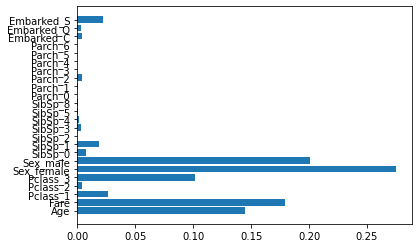

In [22]:
# Plot the feature importances
plt.barh([x for x in X_train.columns],model1.feature_importances_)
plt.show()

### With Cross Validation

In [23]:
gb = GradientBoostingClassifier(random_state = 20)
gb

GradientBoostingClassifier(random_state=20)

In [24]:
# 5-fols cross validation
kf = KFold(n_splits = 5, random_state = 20, shuffle = True )

In [25]:
i = 0
train_accuracy = []
test_accuracy = []
for train, val in kf.split(X_train):
    X_train_kf,X_test_kf = X_train.iloc[train], X_train.iloc[val]
    y_train_kf,y_test_kf = y_train.iloc[train], y_train.iloc[val]
    gb.fit(X_train_kf,y_train_kf)
    print("Training accuracy{}:{}".format(i,gb.score(X_train_kf,y_train_kf)))
    print("Testing accuracy{}:{}".format(i,gb.score(X_test_kf,y_test_kf)))
    print("-------------------------------")
    i = i+1

Training accuracy0:0.9236947791164659
Testing accuracy0:0.784
-------------------------------
Training accuracy1:0.9036144578313253
Testing accuracy1:0.832
-------------------------------
Training accuracy2:0.9016064257028112
Testing accuracy2:0.832
-------------------------------
Training accuracy3:0.9038076152304609
Testing accuracy3:0.7741935483870968
-------------------------------
Training accuracy4:0.9278557114228457
Testing accuracy4:0.7580645161290323
-------------------------------


# -------------------------------------To Be Continued---------------------------------------

## Modelling :: XGBoost

In [26]:
# Install Packages
! pip install xgboost

In [27]:
# Import library
from xgboost import XGBClassifier

In [28]:
xgb = XGBClassifier()

In [29]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [30]:
xgb.score(X_train, y_train)

0.971107544141252

In [31]:
xgb.score(X_test, y_test)

0.8022388059701493

### Hyperparameter Tuning

Same as GBDT

  1. ***n_estimators:*** Total number of trees
  2. ***learning_rate:***This determines the impact of each tree on the final outcome
  3. ***random_state:*** The random number seed so that same random numbers are generated every time
  4.  ***max_depth:*** Maximum depth to which tree can grow (stopping criteria)
  5. ***subsample:*** The fraction of observations to be selected for each tree. Selection is done by random sampling
  6. ***objective:*** Defines Loss function (binary:logistic is for classification using probability, reg:logistic is for classification, reg:linear is for regression)
  7. ***colsample_bylevel:*** Random feature selection at levels
  8. ***colsample_bytree:*** Random feature selection at tree
  
Regularization

1. **gamma:** Minimum reduction in loss at every split
2. **reg_alpha:** Makes leaf weights 0
3. **reg_lambda:** Decrease leaf weights more smoothly

In [46]:
xgb2 = XGBClassifier(random_state=0, colsample_bytree=0.5, max_depth=4)

In [47]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
xgb2.score(X_train, y_train)

0.9406099518459069

In [49]:
xgb2.score(X_test, y_test)

0.8171641791044776

In [55]:
xgb3 = XGBClassifier(gamma=0.1, random_state=0,max_depth=6)

In [56]:
xgb3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
xgb3.score(X_train,y_train)

0.9743178170144462

In [58]:
xgb3.score(X_test, y_test)

0.7910447761194029

In [60]:
# Feature importance
xgb.feature_importances_

array([0.02685166, 0.02729094, 0.09365978, 0.02775693, 0.1682885 ,
       0.36228034, 0.        , 0.02703577, 0.03966548, 0.0055626 ,
       0.01651891, 0.07001162, 0.        , 0.        , 0.02786385,
       0.02533452, 0.01463274, 0.        , 0.        , 0.        ,
       0.        , 0.02679046, 0.00726175, 0.03319416], dtype=float32)

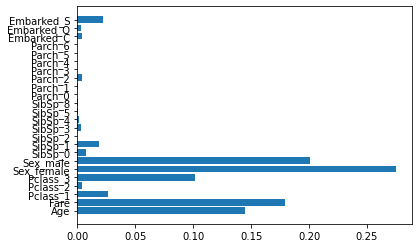

In [61]:
plt.barh([x for x in X_train.columns],model1.feature_importances_)
plt.show()

## Modelling :: AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
# Create Ada Boost Instance
ab = AdaBoostClassifier(random_state = 0)

In [64]:
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [65]:
ab.score(X_train, y_train)

0.8443017656500803

In [66]:
ab.score(X_test, y_test)

0.7761194029850746

### Hyperparameter 
Same as other Boosting

## Modelling :: LightGBM

## Modelling :: catBoost